# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset:

Import the necessary libraries and create your dataframe(s).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sb

beer_df = pd.read_csv("beer_reviews.csv", index_col=[0])
beer_df.head()

C:\Users\Madeline\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
brewery_id,,,,,,,,,,,,
10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [3]:
for col in beer_df.columns:
    pct_missing = np.mean(beer_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100, 3)))
    
    # As noted in previous step, there are null values in the brewery name, profile name, and
# ABV columns.
# For the profile name and brewery name columns, there is so little missing data that I am comfortable removing
# the rows where the data is missing - it is unlikely to affect the analysis much to delete so little data.
# For the ABV, however, 4% is a lot of missing data. I know that ABV is strongly associated with the
# style of beer. My strategy is to find the average ABV by type of beer and replace the missing ABV values
# with the average of its corresponding beer_style.

brewery_name - 0.001%
review_time - 0.0%
review_overall - 0.0%
review_aroma - 0.0%
review_appearance - 0.0%
review_profilename - 0.022%
beer_style - 0.0%
review_palate - 0.0%
review_taste - 0.0%
beer_name - 0.0%
beer_abv - 4.272%
beer_beerid - 0.0%


In [5]:
beer_df = beer_df.dropna(subset=["brewery_name"])
beer_df = beer_df.dropna(subset=["review_profilename"])
#This code will drop rows where brewery_name and review_profilename are null

In [10]:
print(beer_df.isnull().sum()) # Check for null values

brewery_name          0
review_time           0
review_overall        0
review_aroma          0
review_appearance     0
review_profilename    0
beer_style            0
review_palate         0
review_taste          0
beer_name             0
beer_abv              0
beer_beerid           0
dtype: int64


In [9]:
# I need to code imputing the data for abv based on style. For now, I'll replace the null
# values with the average overall abv.
beer_df['beer_abv'].fillna(beer_df['beer_abv'].mean(), inplace = True)

## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

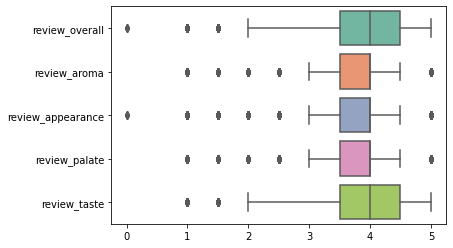

In [37]:
beer_df["beer_beerid"] = beer_df["beer_beerid"].astype("string") 
#Making sure ID isn't charted as a number in future graphs!
ax = sb.boxplot(data=beer_df, orient="h", palette="Set2")
ax.set_xticks(range(6))
# All review values appear to be within the 0-5 range

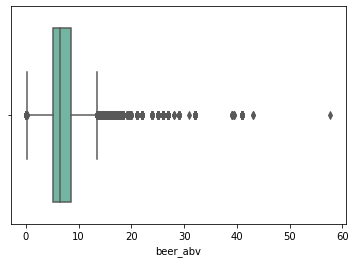

In [13]:
ax = sb.boxplot(x=beer_df['beer_abv'], orient="h", palette="Set2")
# Apparently there really are some beers that are 50%+ ABV so 
# it looks like all the values in this set check out.

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [36]:
# The only variable I can think of that would be review time.
# All the other review metrics will be helpful for analysis, and I would
# like to keep username information in the system to analyze preference trends for 
# power users versus regualr users. The names of the breweries and beers and the style 
# will all still be relevant.
# I will drop the review time and keep the rest of the data in.
beer_df.drop ("review_time", axis=1, inplace=True)
beer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1586251 entries, 10325 to 14359
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_name        1586251 non-null  object 
 1   review_overall      1586251 non-null  float64
 2   review_aroma        1586251 non-null  float64
 3   review_appearance   1586251 non-null  float64
 4   review_profilename  1586251 non-null  object 
 5   beer_style          1586251 non-null  object 
 6   review_palate       1586251 non-null  float64
 7   review_taste        1586251 non-null  float64
 8   beer_name           1586251 non-null  object 
 9   beer_beerid         1586251 non-null  string 
dtypes: float64(5), object(4), string(1)
memory usage: 133.1+ MB


## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [ ]:
# I know styles, brewery name, and beer name are the categorical columns in this dataframe. I can check 
# on styles manually:

In [17]:
styles = beer_df['beer_style'].unique()
styles.sort()
styles #All looks okay. As for brewery name and beer name, there are many values
# that would have to be checked. I know from the website's interface that these names are generated from a picklist
# instead of manual entry, so I don't expect inconsistencies in this data.

array(['Altbier', 'American Adjunct Lager', 'American Amber / Red Ale',
       'American Amber / Red Lager', 'American Barleywine',
       'American Black Ale', 'American Blonde Ale', 'American Brown Ale',
       'American Dark Wheat Ale', 'American Double / Imperial IPA',
       'American Double / Imperial Pilsner',
       'American Double / Imperial Stout', 'American IPA',
       'American Malt Liquor', 'American Pale Ale (APA)',
       'American Pale Lager', 'American Pale Wheat Ale',
       'American Porter', 'American Stout', 'American Strong Ale',
       'American Wild Ale', 'Baltic Porter', 'Belgian Dark Ale',
       'Belgian IPA', 'Belgian Pale Ale', 'Belgian Strong Dark Ale',
       'Belgian Strong Pale Ale', 'Berliner Weissbier',
       'Bière de Champagne / Bière Brut', 'Bière de Garde', 'Black & Tan',
       'Bock', 'Braggot', 'California Common / Steam Beer', 'Chile Beer',
       'Cream Ale', 'Czech Pilsener', 'Doppelbock',
       'Dortmunder / Export Lager', 'Dubbel', 'Du

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?
2. Did the process of cleaning your data give you new insights into your dataset?
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?